## Question:
ابتدا اعداد را نرمال کنید و اگر کتگوری دارد به عدد تبدیل شوند
و در نهایت  بین گروه خانم ها و آقایان با  ستون  نتیجه که purchased هست مقایسه انجام دهید
به دو صورت  مقایسه کنید ( در کد جای دو ستون عوض شود)
و در نهایت برای دیتا ست باکس پلات برای هر  ستون رسم شود
و  برای ستون age و EstimatedSalary نمودار اسکتر ان را ترسیم کنید
و در نهایت الگوریتم k_means را  با  تعیین ۳ مرکز برای دو ستون   
age و EstimatedSalary
پیاده سازی کنید و ده نقطه بدهید  و پیش بینی کنید هر نقطه در کدام گروه می‌رود

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Comparison based on Gender:
Gender
0    0.336735
1    0.377451
Name: Purchased, dtype: float64

Comparison based on Purchased:
Purchased
0    0.494163
1    0.538462
Name: Gender, dtype: float64


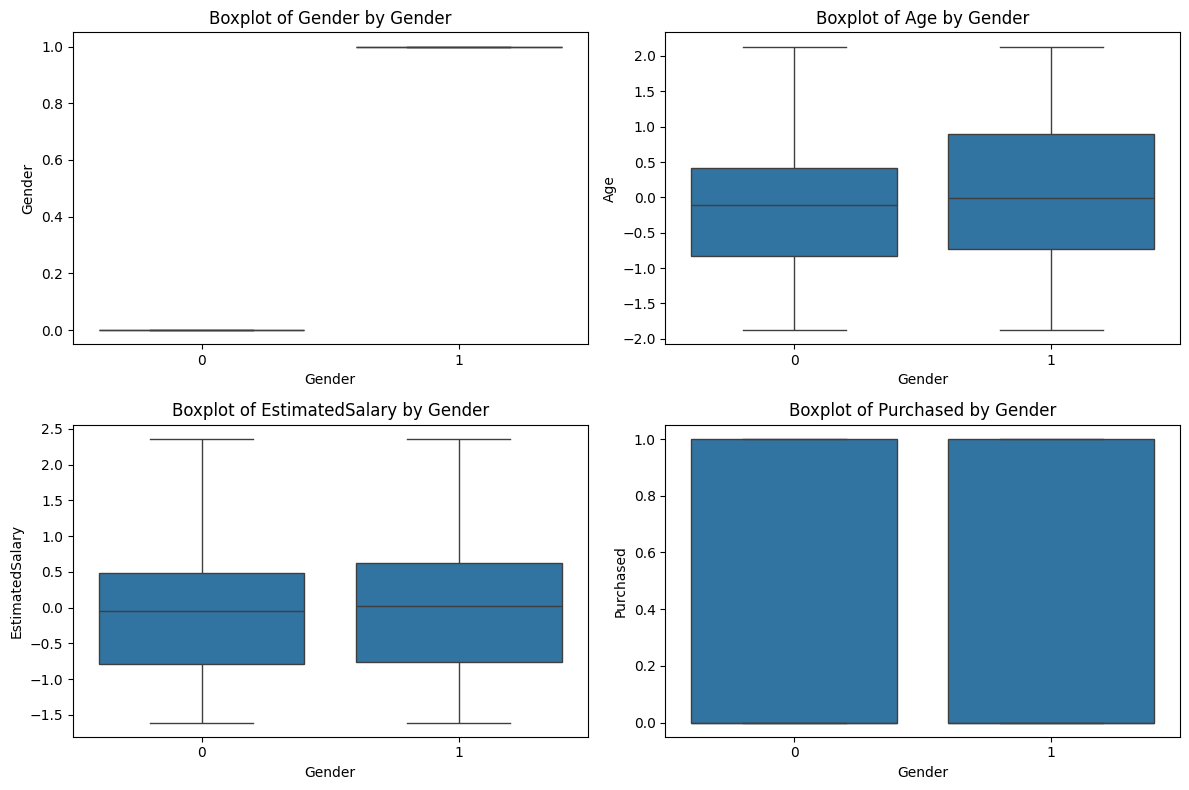

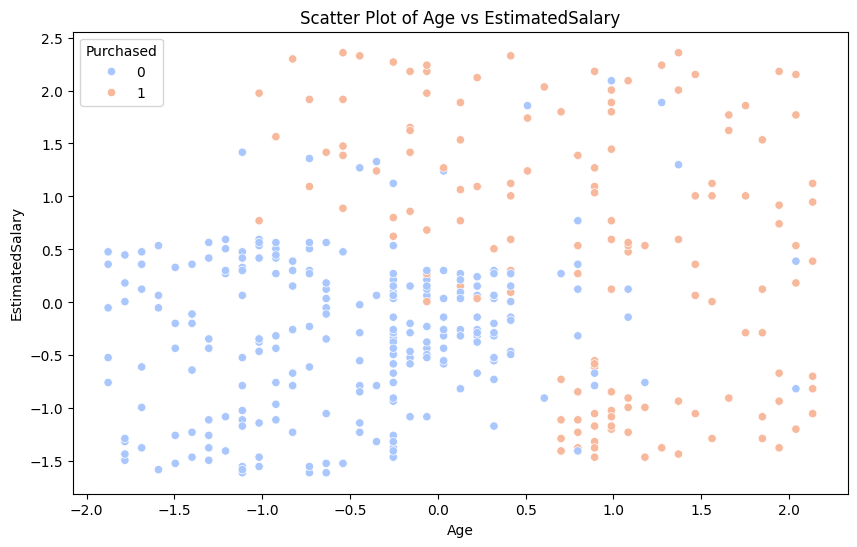

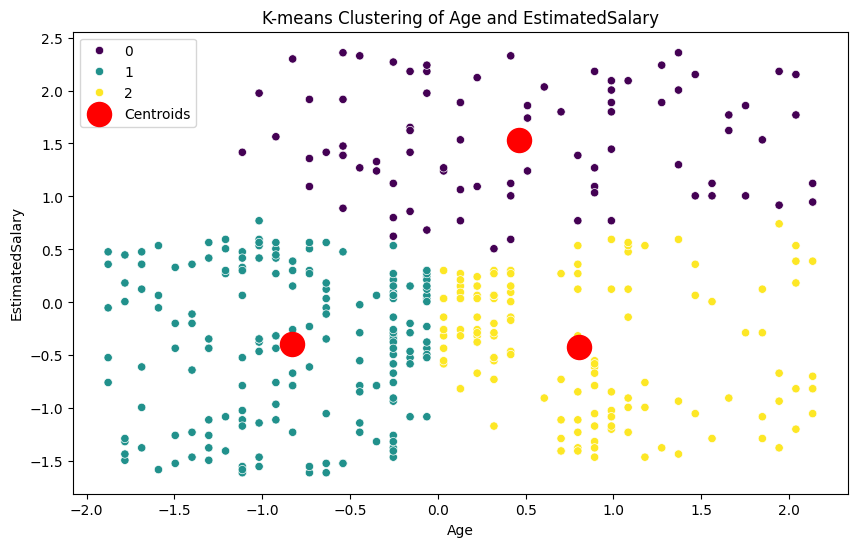

Predicted clusters for new points:
[1 1 1 1 2 1 2 1 1 1]


In [9]:
data = pd.read_csv('./age_salary.csv')

# نرمال سازی داده‌ها
scaler = StandardScaler()
data[['Age', 'EstimatedSalary']] = scaler.fit_transform(data[['Age', 'EstimatedSalary']])

# تبدیل جنسیت به عدد
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

comparison1 = data.groupby('Gender')['Purchased'].mean()
comparison2 = data.groupby('Purchased')['Gender'].mean()

print("Comparison based on Gender:")
print(comparison1)
print("\nComparison based on Purchased:")
print(comparison2)

plt.figure(figsize=(12, 8))
for i, column in enumerate(data.columns[1:], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Gender', y=column, data=data)
    plt.title(f'Boxplot of {column} by Gender')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=data, palette='coolwarm')
plt.title('Scatter Plot of Age vs EstimatedSalary')
plt.show()

# پیاده‌سازی الگوریتم K-means
kmeans = KMeans(n_clusters=3)
data['Cluster'] = kmeans.fit_predict(data[['Age', 'EstimatedSalary']])

# رسم نمودار
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Cluster', palette='viridis', data=data)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K-means Clustering of Age and EstimatedSalary')
plt.legend()
plt.show()

new_points = pd.DataFrame({
    'Age': [30, 22, 27, 35, 40, 18, 50, 21, 23, 31],
    'EstimatedSalary': [40000, 50000, 60000, 70000, 80000, 20000, 90000, 30000, 25000, 45000]
})
new_points[['Age', 'EstimatedSalary']] = scaler.transform(new_points[['Age', 'EstimatedSalary']])
predictions = kmeans.predict(new_points)

print("Predicted clusters for new points:")
print(predictions)
